# Pet-project: "Классификация пролонгации страховых договоров"

## Выполнил: Сорочайкин Александр Ярославович

## Подключение необходимых библиотек

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

## Загрузка и разведочный анализ данных

In [11]:
sheets_dict = pd.read_excel('prolongation.xlsx', sheet_name=None)

In [3]:
print(sheets_dict.keys())

dict_keys(['Переменные', 'data_full'])


In [4]:
df_about = sheets_dict['Переменные']  # замените 'Sheet1' на нужное вам имя листа
df = sheets_dict['data_full']  # замените 'Sheet1' на нужное вам имя листа

In [5]:
df_about

,id,ID договора
0,Filial,Филиал продажи
1,Type_ts,Тип ТС
2,passport_region,Регион по серии паспорта
3,VIP,VIP клиент
4,Brand,Марка ТС
5,Model,Модель ТС
6,Yr_production,Год выпуска ТС
7,GAP,GAP застрахован
8,married,Брак
9,KBM,КБМ


In [6]:
df.sample(5)

,ID,Filial,Type_ts,passport_region,VIP,Brand,Model,Yr_production,GAP,married,...,Age,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,target
3315,3316,Екатеринбургский,Иностранные,Челябинская область,NaN,HYUNDAI,CRETA,2017,Да,Состоит в браке,...,34,11,1.0,800000,M,0,10000,0.010,0,0
10180,10181,Краснодарский,Иностранные,Краснодарский край,NaN,HYUNDAI,CRETA,2018,Нет,Состоит в браке,...,47,3,1.0,1000000,F,0,55000,0.050,0,-1
901,902,Московский,Иностранные,Москва,NaN,TOYOTA,RAV 4,2018,Нет,Состоит в браке,...,51,8,1.1,1400000,F,0,45000,0.030,1,0
10002,10003,Краснодарский,Отечественные,Саратовская область,NaN,LADA,GRANTA,2017,Нет,Состоит в браке,...,35,16,1.0,200000,M,0,10000,0.025,1,-1
1334,1335,Воронежский,Отечественные,Воронежская область,NaN,LADA,VESTA,2017,Нет,Состоит в браке,...,59,41,1.0,400000,M,0,10000,0.015,0,0


In [7]:
info = pd.DataFrame(index = df.columns)
info['Тип данных'] = df.dtypes
info['Количество уникальных значений'] = df.nunique()
info['Количество значений'] = df.count()
info['Количество пропущенных значений'] = df.isna().sum()
info

,Тип данных,Количество уникальных значений,Количество значений,Количество пропущенных значений
ID,int64,10863,10863,0
Filial,object,22,10863,0
Type_ts,object,2,10863,0
passport_region,object,85,10863,0
VIP,object,2,284,10579
Brand,object,23,10863,0
Model,object,200,10863,0
Yr_production,int64,10,10863,0
GAP,object,2,10863,0
married,object,2,10863,0


Разделим фичи на 2 группы:
    1. Категориальные фичи, с типом данных object (требующие отдельного преобразования)
    2. Остальные фичи

In [8]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
print("Числовые фичи:", numeric_columns)

Числовые фичи: ['ID', 'Yr_production', 'KBM', 'KBM_prol_est', 'delta_kbm', 'Age', 'Exp', 'discount', 'Amount - gr', 'premium_car', 'price_gr', 'price_prc', 'OSAGO_clnt', 'target']


In [9]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print("Фичи с типом данных object:", object_columns)

Фичи с типом данных object: ['Filial', 'Type_ts', 'passport_region', 'VIP', 'Brand', 'Model', 'GAP', 'married', 'deduct', 'deduct_amount', 'product', 'Bank', 'channel - map', 'category', 'kvs_type', 'sex']


Выводы по изучению признаков и план дальнейшего исследования:
1. Составлены списки признаков, по их типам
2. Обнаружена проблема с пропусками данных в одном из признаков, предположительно, являющаяся природой данных
3. Признаки object_columns - категориальные признаки, которые описаны не числовыми значениями -> требуют отдельных преобразований
4. По условию задачи, тестовый датасет включен в тренировочный. Их необходимо разделить

План:
1. Подробное изучение категориальных признаков, включая отбор. Проведение необходимых преобразований.
2. Подробное изучение числовых признаков, включая отбор.
3. Проведение корреляционного анализа
4. Анализ важности признаков на основе моделей
5. Написание функции для преобразования данных
7. Обучение моделей
8. Обработка тестовых данных, применение модели
Сохранить данные в файл

In [10]:
df_test = df[df['target'] == -1]
df_test.head()

,ID,Filial,Type_ts,passport_region,VIP,Brand,Model,Yr_production,GAP,married,...,Age,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,target
7598,7599,Московский,Иностранные,Москва,NaN,HYUNDAI,CRETA,2017,Да,Состоит в браке,...,40,20,1.00,1000000,M,0,25000,0.025,1,-1
7599,7600,Московский,Иностранные,Московская область,NaN,TOYOTA,RAV 4,2015,Нет,Состоит в браке,...,61,20,1.10,1000000,F,0,45000,0.040,1,-1
7600,7601,Московский,Иностранные,Москва,NaN,HYUNDAI,CRETA,2018,Нет,Не состоит в браке,...,49,12,0.95,1200000,M,0,30000,0.025,1,-1
7601,7602,Казанский,Иностранные,Республика Татарстан,NaN,KIA,SORENTO,2016,Нет,Состоит в браке,...,47,24,1.00,800000,M,0,10000,0.010,1,-1
7602,7603,Нижегородский,Отечественные,Нижегородская область,NaN,UAZ,PATRIOT,2016,Нет,Не состоит в браке,...,44,23,1.00,600000,M,0,10000,0.020,0,-1


In [11]:
df = df[df['target'] != -1]

## Изучение категориальных признаков

In [12]:
df[object_columns].head()

,Filial,Type_ts,passport_region,VIP,Brand,Model,GAP,married,deduct,deduct_amount,product,Bank,channel - map,category,kvs_type,sex
0,Магнитогорский,Иностранные,Челябинская область,NaN,TOYOTA,RAV 4,Нет,Состоит в браке,Франшиза 2-ой страховой случай,20000+,Классика,Банк,Автосалоны,NB 0-1,Водители согласно перечню,M
1,Магнитогорский,Отечественные,Челябинская область,NaN,LADA,GRANTA,Нет,Состоит в браке,Без франшизы,0,Компакт,Банк,Автосалоны,RN,Водители согласно перечню,M
2,Ростовский,Отечественные,Ростовская область,NaN,LADA,GRANTA,Нет,Не состоит в браке,Без франшизы,0,Классика,Банк,Автосалоны,NB 0-1,Водители согласно перечню,F
3,Казанский,Иностранные,Республика Татарстан,NaN,KIA,RIO,Нет,Не состоит в браке,Без франшизы,0,Компакт,Сетелем,Автосалоны,RN,Водители согласно перечню,M
4,Московский,Иностранные,Москва,NaN,DATSUN,ON-DO,Нет,Состоит в браке,Без франшизы,0,Компакт,Без банка,Розница,NB 0-1,Водители согласно перечню,M


In [13]:
def plot_distribution(df, name, plot_type):
    unique_values = df[name].nunique()
    print(f"Количество уникальных значений: {unique_values}")
    
    if plot_type == 1 or plot_type == 3:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=name, order=df[name].value_counts().index)
        plt.title(f'Распределение категорий для {name}')
        plt.xlabel(name)
        plt.ylabel('Частота')
        plt.xticks(rotation=45)
    
    if plot_type == 2 or plot_type == 3:
        plt.figure(figsize=(6, 6))
        plt.pie(df[name].value_counts(), labels=df[name].unique(), autopct='%1.1f%%')
    
    plt.show()

### Признак Filial - Филиал продажи

Количество уникальных значений: 22


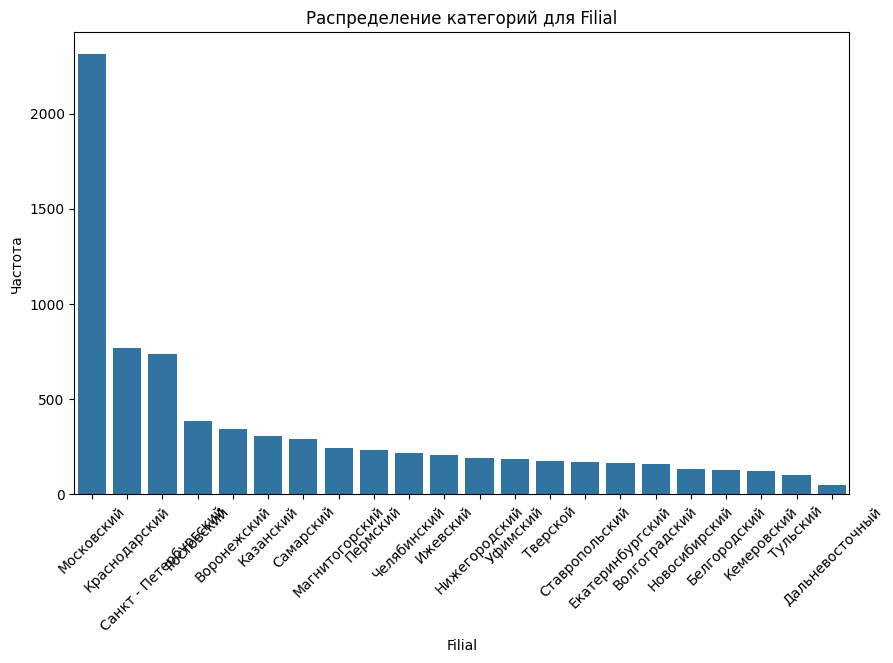

In [14]:
plot_distribution(df, 'Filial', 1)

Данный признак содержит 22 различных города. Скорее всего, данный признак не настолько важен, чтобы применять к нему one hot encoding и получать 22 новых признака. Стоит протестировать гипотезу 2 кодированием через one hot encoding, после чего, можно попробовать превратить данный признак в бинарный/разбить на 3-4 категории по частоте/исключить из использования

### Признак Type TS - тип транспортного средства

Количество уникальных значений: 2


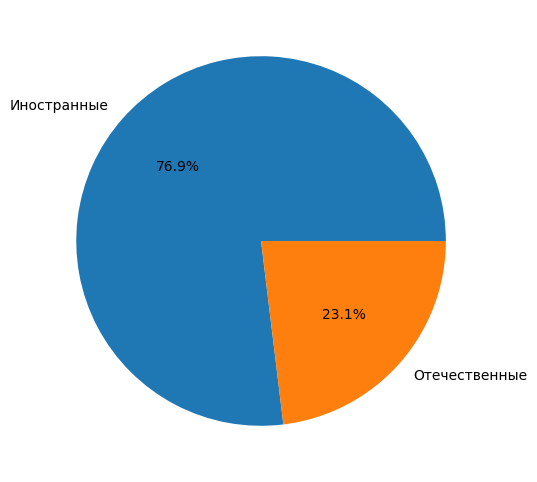

In [15]:
plot_distribution(df, 'Type_ts',2)

Видим, что данный признак можно преобразовать в бинарный. Минорное значение составляет 23% от общего количество, что не позволяет его свободно отбросить

### Признак passport region - Регион по серии паспорта

Количество уникальных значений: 85


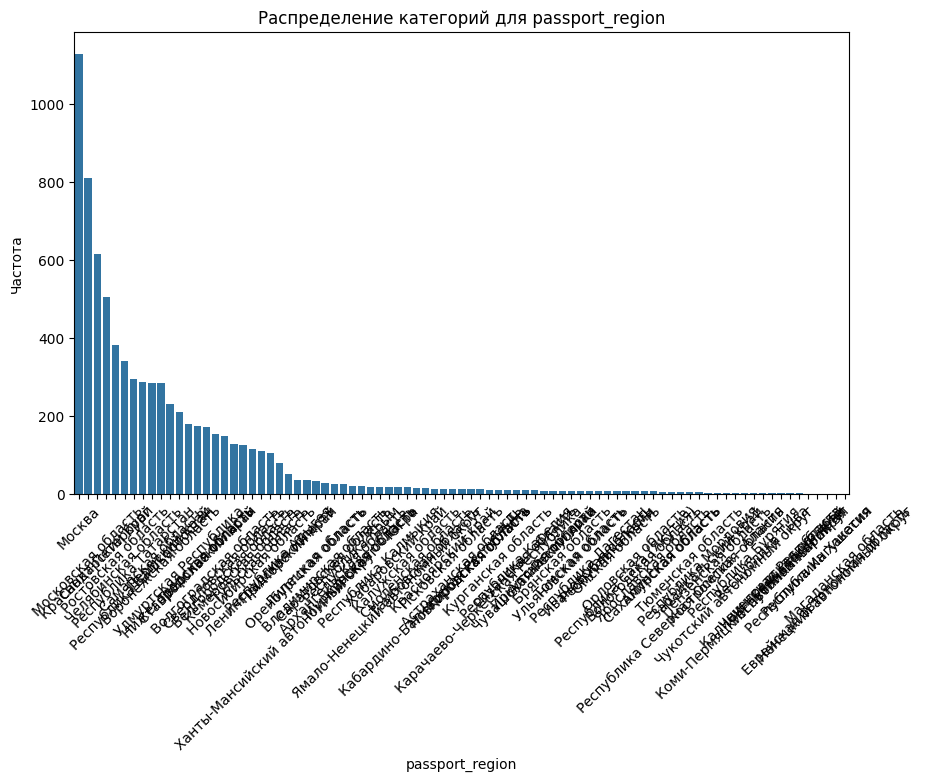

In [16]:
plot_distribution(df, 'passport_region',1)

На графике видим распределение с длинным хвостом. При обработке данного признака имеет смысл применить сокращенное кодирование, т.е. разбить имеющиеся у нас 85 значений на группы.

### Vip клиент

In [17]:
df_about[df_about['id'] == 'VIP']

,id,ID договора
3,VIP,VIP клиент


Количество уникальных значений: 2


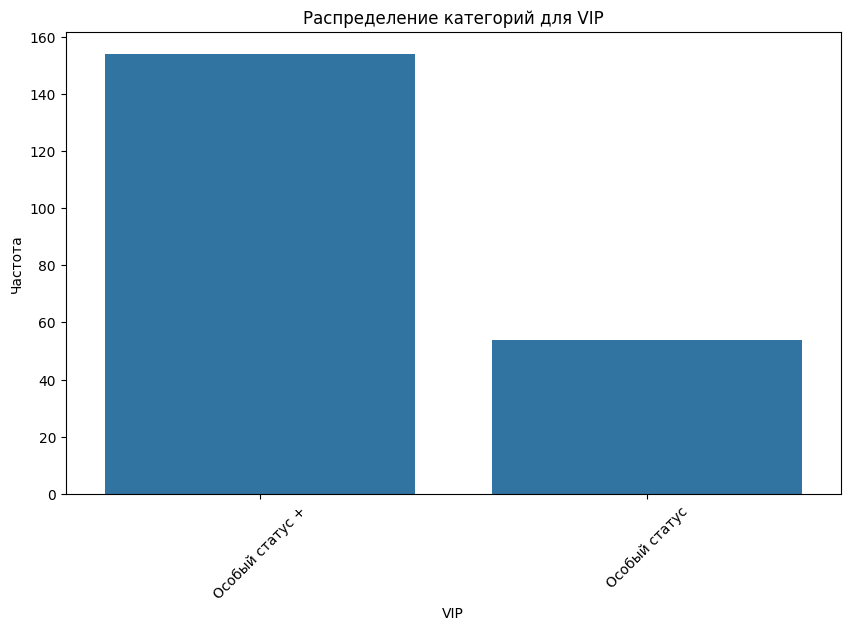

In [18]:
plot_distribution(df, 'VIP',1)

In [19]:
df['VIP'].unique()

array([nan, 'Особый статус +', 'Особый статус'], dtype=object)

In [20]:
df.shape[0]

7598

Помним, что в данном признаке большое количество пропущенных значений. По графику, у нас всего 200 ненулевых значений на 7000, а это менее 3%. Однако, природа данных указывает на то, что данный признак необходимо учесть. Поэтому, сделаем из этого признака 2 бинарных - принадлежность особому статусу и особому статусу + (возможно стоит применить label encoding, недостаточно информации о том, насколько особый статус и он же с + сильно отличаются и могут быть ранжированы)

### Brand

In [21]:
df_about[df_about['id'] == 'Brand']

,id,ID договора
4,Brand,Марка ТС


Количество уникальных значений: 23


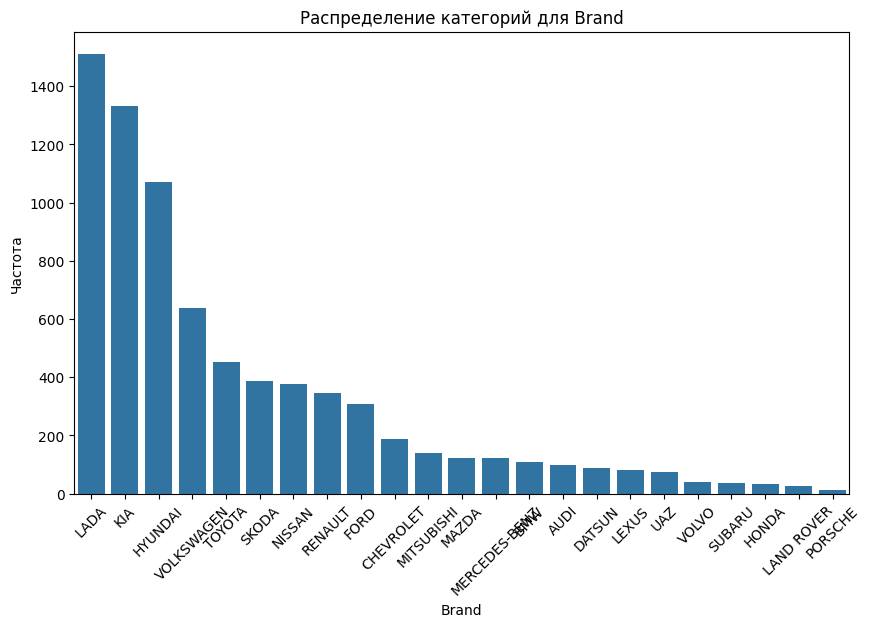

In [22]:
plot_distribution(df, 'Brand',1)

Опираясь на график и природу данных выведем две идеи:
1. one hot encoding
2. Разбить на несколько подкатегорий

### Model

In [23]:
df_about[df_about['id'] == 'Model']

,id,ID договора
5,Model,Модель ТС


Количество уникальных значений: 190


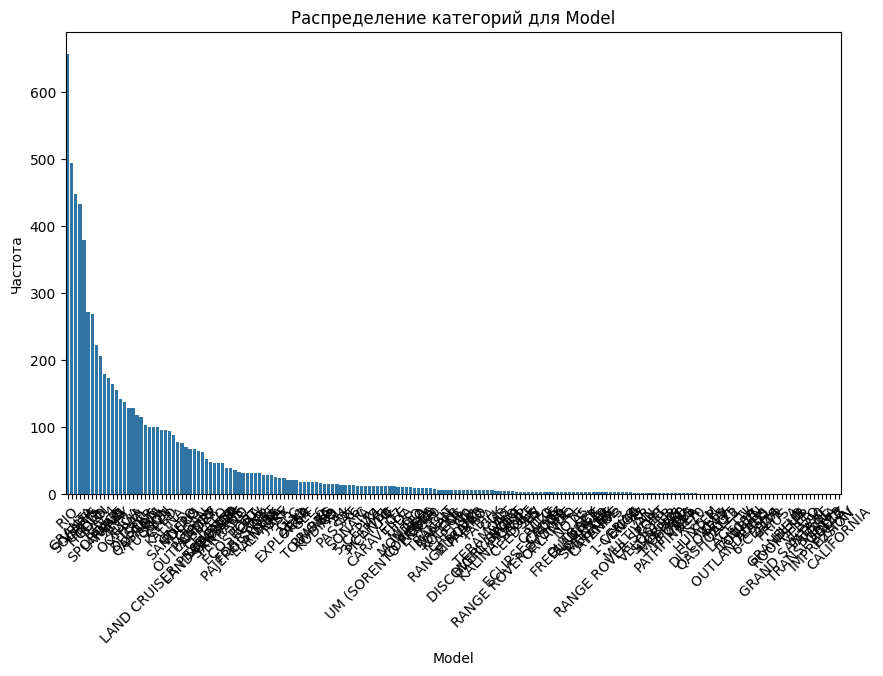

In [24]:
plot_distribution(df, 'Model',1)

Имеем огромное число различных значений данного признака. Стоит обдумать идею о категоризации по разделам (по популярности. Либо закодировать только несколько значимых моделей, а остальные не учитывать)

### GAP

In [25]:
df_about[df_about['id'] == 'GAP']

,id,ID договора
7,GAP,GAP застрахован


Количество уникальных значений: 2


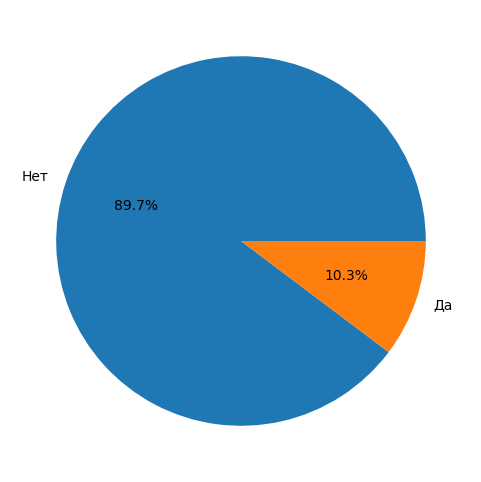

In [26]:
plot_distribution(df, 'GAP',2)

### Married

In [27]:
df_about[df_about['id'] == 'married']

,id,ID договора
8,married,Брак


Количество уникальных значений: 2


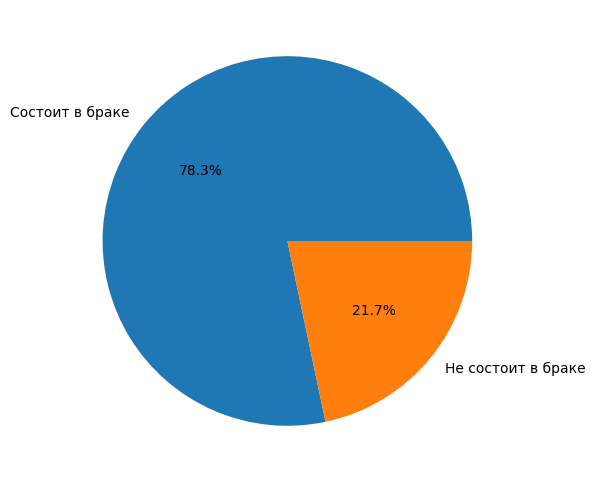

In [28]:
plot_distribution(df, 'married',2)

### deduct

In [29]:
df_about[df_about['id'] == 'deduct']

,id,ID договора
12,deduct,Тип франшизы


Количество уникальных значений: 3


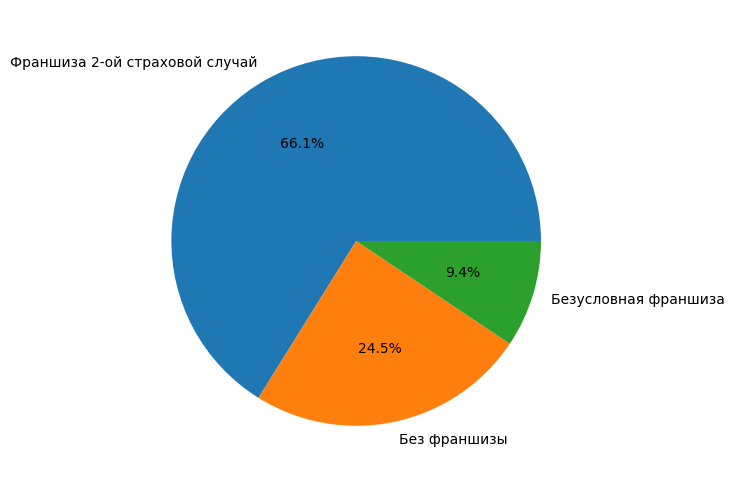

In [30]:
plot_distribution(df, 'deduct',2)

### deduct amount

In [31]:
df_about[df_about['id'] == 'deduct_amount']

,id,ID договора
13,deduct_amount,Сумма франшизы (0 -без франшизы;20000- - франш...


Количество уникальных значений: 3


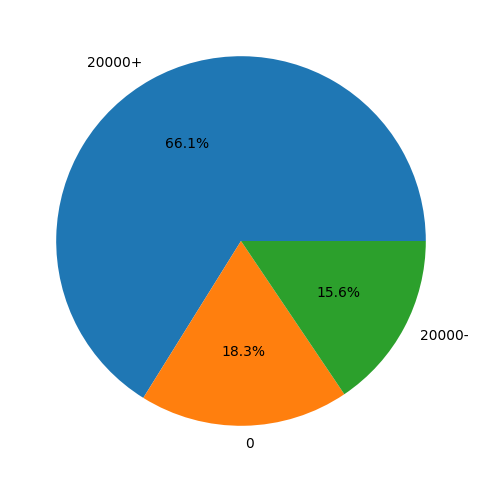

In [32]:
plot_distribution(df, 'deduct_amount',2)

### product

In [33]:
df_about[df_about['id'] == 'product']

,id,ID договора
14,product,Продукт


Количество уникальных значений: 4


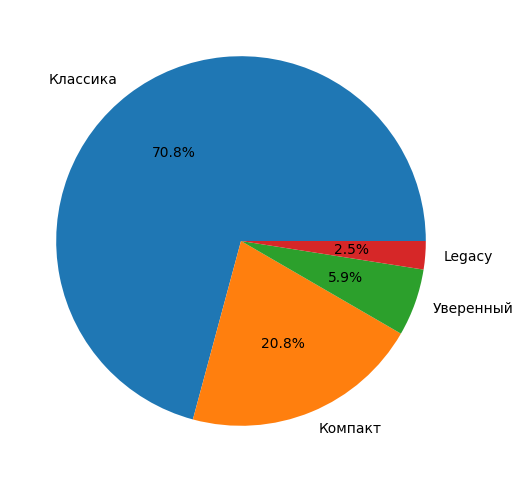

In [34]:
plot_distribution(df, 'product',2)

### Bank

In [35]:
df_about[df_about['id'] == 'Bank']

,id,ID договора
15,Bank,Машина в залоге банка


Количество уникальных значений: 3


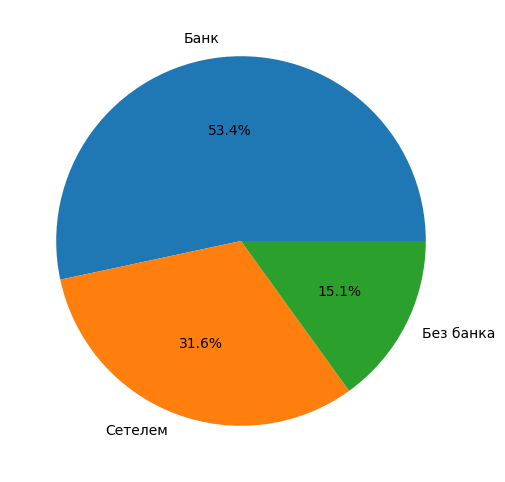

In [36]:
plot_distribution(df, 'Bank',2)

### Сhannel

In [37]:
df_about[df_about['id'] == 'channel - map']

,id,ID договора
16,channel - map,Канал


Количество уникальных значений: 2


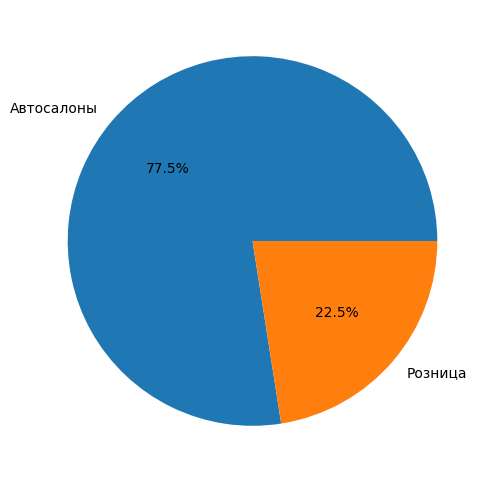

In [38]:
plot_distribution(df, 'channel - map',2)

### category

In [39]:
df_about[df_about['id'] == 'category']

,id,ID договора
17,category,Тип бизнеса


Количество уникальных значений: 4


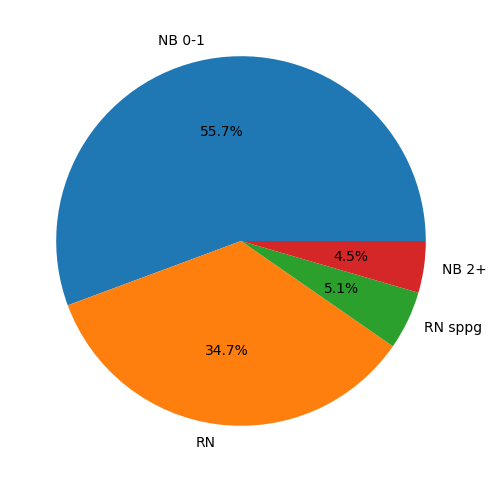

In [40]:
plot_distribution(df, 'category',2)

### kvs_type

In [41]:
df_about[df_about['id'] == 'kvs_type']

,id,ID договора
18,kvs_type,Тип ЛДУ


Количество уникальных значений: 2


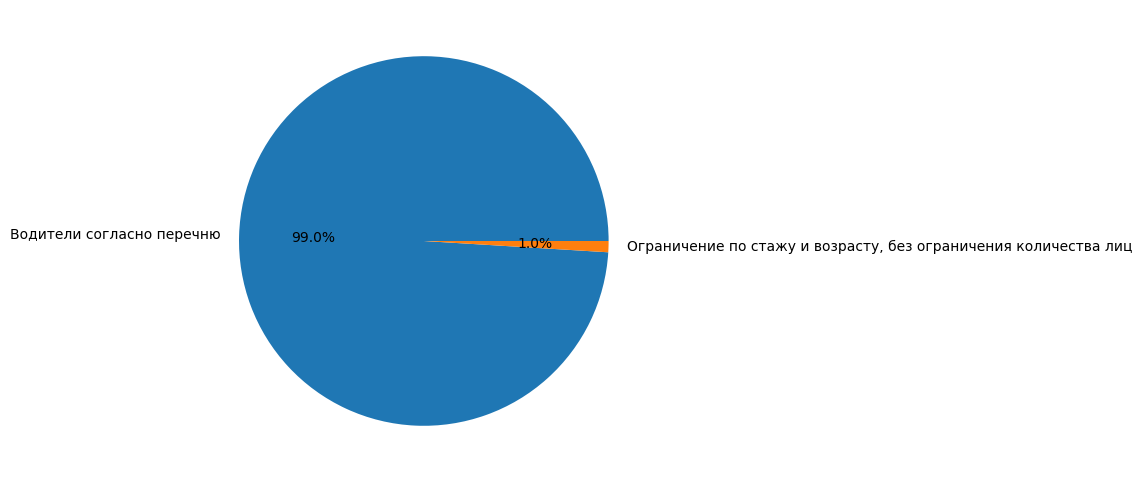

In [42]:
plot_distribution(df, 'kvs_type',2) 

Предположительно, имеет смысл отбросить

### sex

In [43]:
df_about[df_about['id'] == 'sex']

,id,ID договора
23,sex,Пол


Количество уникальных значений: 3


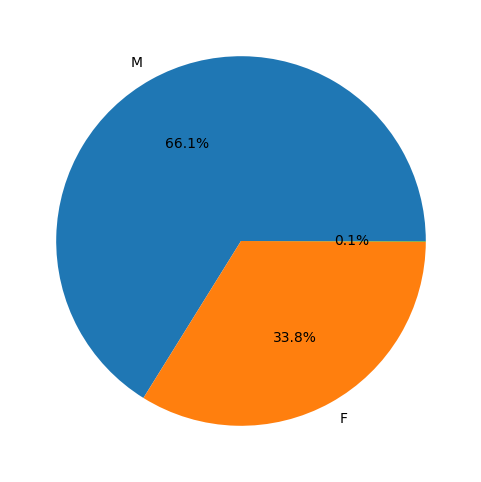

In [44]:
plot_distribution(df, 'sex',2)

In [45]:
df['sex'].unique()

array(['M', 'F', ' '], dtype=object)

Необходимо обработать "пропущенные" значения

### Вывод

1. Признаки category, Bank, product, deduct amount, deduct - one hot encoding
2. Признаки channel - map, Married, GAP, Type_ts - преобразовать в бинарные категории
3. Признаки (Filial, Brand - либо one hot), passport_region, Model - особое разбиение
4. Признак kvs_type - необходимо отбросить
5. Признак sex - необходимо обработать пропущенные значения и закодировать через one-hot
6. Признак VIP - разбить на два бинарных

## Изучение числовых признаков

In [46]:
describe = df[numeric_columns].describe().T
describe['mean'] = describe['mean'].apply(lambda x: '{:.2f}'.format(x))
describe['std'] = describe['std'].apply(lambda x: '{:.2f}'.format(x))
describe['max'] = describe['max'].apply(lambda x: '{:.2f}'.format(x))
describe

,count,mean,std,min,25%,50%,75%,max
ID,7598.0,3799.50,2193.50,1.0,1900.25,3799.50,5698.750,7598.00
Yr_production,7598.0,2016.94,1.55,2009.0,2016.00,2018.00,2018.000,2018.00
KBM,7598.0,7.05,1.92,0.0,6.00,8.00,8.000,12.00
KBM_prol_est,7598.0,5.19,1.73,0.0,5.00,6.00,6.000,10.00
delta_kbm,7598.0,-5.07,17.26,-100.0,-2.00,-2.00,-2.000,2.00
Age,7598.0,43.73,11.31,18.0,35.00,42.00,52.000,83.00
Exp,7598.0,17.23,9.65,0.0,10.00,16.00,22.000,63.00
discount,7598.0,1.00,0.05,0.9,1.00,1.00,1.000,1.10
Amount - gr,7598.0,979626.22,682881.39,0.0,600000.00,800000.00,1200000.000,3000000.00
premium_car,7598.0,0.09,0.28,0.0,0.00,0.00,0.000,1.00


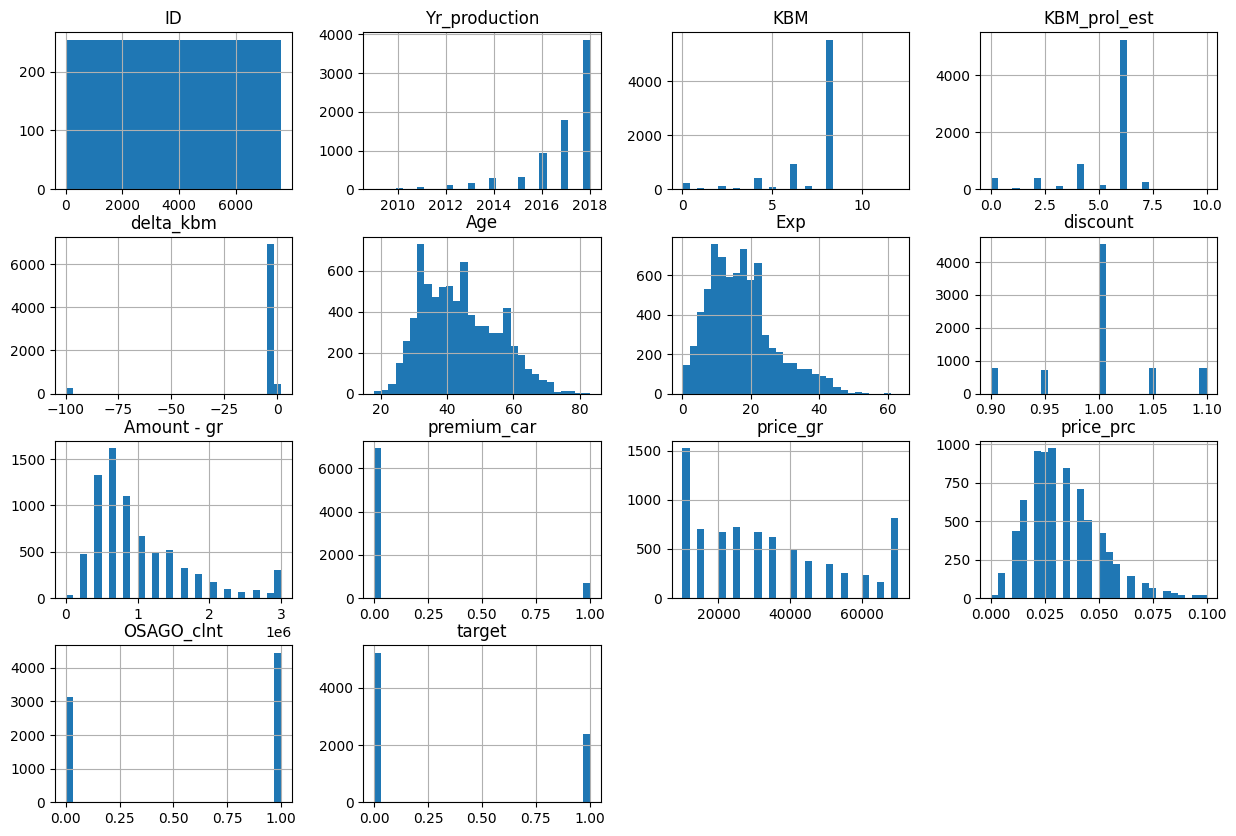

In [47]:
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.show()

Выводы:
1. Признак ID не нужен при обучении. От него можно избавиться
2. Yr_production - Преобразовать в категориальный через one hot encoding
3. delta_kbm - стоит рассмотреть на более крупном масштабе
4. price_gr, amount - gr, exp - необходимо масштабировать (нормализовать)
5. age - Имеет смысл разбить на категории по возрастным промежуткам

### delta_kbm

In [48]:
df_about[df_about['id'] == 'delta_kbm']

,id,ID договора
11,delta_kbm,Изменение КБМ


Количество уникальных значений: 6


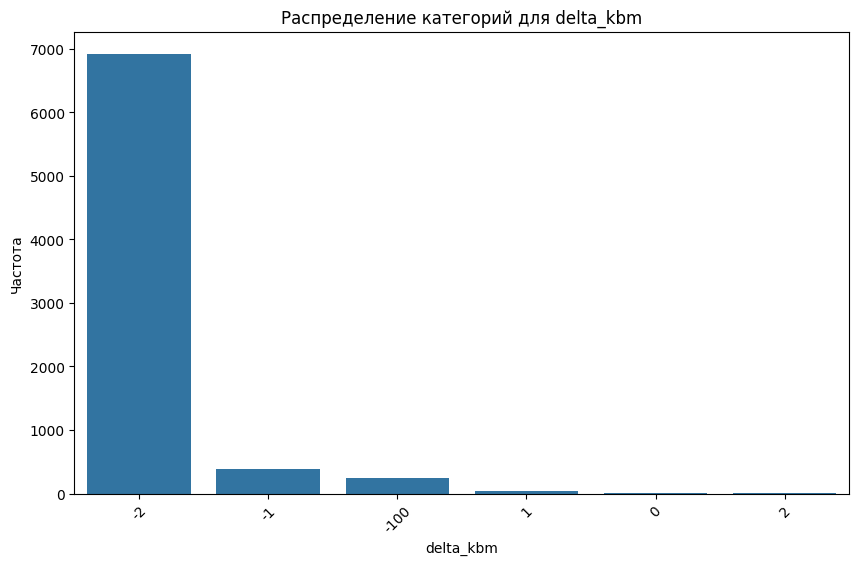

In [49]:
plot_distribution(df, 'delta_kbm',1)

Выводы:
1. Признак ID не нужен при обучении. От него можно избавиться
2. Yr_production - Преобразовать в категориальный через one hot encoding
3. delta_kbm - оставить как есть, либо поделить на категориальные (из-за значения -100)
4. price_gr, amount - gr, exp - необходимо масштабировать (нормализовать)
5. age - Имеет смысл разбить на категории по возрастным промежуткам

### Подготовим функцию преобразования признаков

In [50]:
df.columns

Index(['ID', 'Filial', 'Type_ts', 'passport_region', 'VIP', 'Brand', 'Model',
       'Yr_production', 'GAP', 'married', 'KBM', 'KBM_prol_est', 'delta_kbm',
       'deduct', 'deduct_amount', 'product', 'Bank', 'channel - map',
       'category', 'kvs_type', 'Age', 'Exp', 'discount', 'Amount - gr', 'sex',
       'premium_car', 'price_gr', 'price_prc', 'OSAGO_clnt', 'target'],
      dtype='object')

In [51]:
def preprocess_dataframe(df):
    # 1. Признаки category, Bank, product, deduct amount, deduct - one hot encoding
    one_hot_cols = ['category', 'Bank', 'product', 'deduct_amount', 'deduct', 'Filial', 'Brand']
    df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True, dtype=int)
    
    # 2. Признаки channel - map, Married, GAP, Type_ts - преобразовать в бинарные категории
    binary_cols = ['channel - map', 'married', 'GAP', 'Type_ts','kvs_type']
    imputer = SimpleImputer(strategy='most_frequent')
    df[binary_cols] = imputer.fit_transform(df[binary_cols])
    
    for col in binary_cols:
        most_frequent_value = df[col].value_counts().idxmax()
        df[col] = df[col].apply(lambda x: 1 if x == most_frequent_value else 0)
        
    # 3. Признаки Model, passport_region - особое разбиение
    def categorize_by_frequency(df, col, n_classes=10):
        value_counts = df[col].value_counts()
        thresholds = np.linspace(0, value_counts.sum(), n_classes + 1)
        thresholds = thresholds[1:-1]
        labels = range(n_classes)
        df[f'{col}_class'] = np.digitize(df[col].map(value_counts), bins=thresholds, right=True)
        df[f'{col}_class'] = df[f'{col}_class'].map(dict(zip(labels, labels)))
        df.drop(columns=[col], inplace=True)
        return df

    df = categorize_by_frequency(df, 'Model')
    df = categorize_by_frequency(df, 'passport_region')

    # 4. Признак sex - необходимо обработать пропущенные значения и закодировать через one-hot
    df['sex'] = df['sex'].replace(' ', df['sex'].mode()[0])
    df = pd.get_dummies(df, columns=['sex'], drop_first=True, dtype=int)
    
    # 5. Признак VIP - разбить на два бинарных
    df['VIP_high'] = df['VIP'].apply(lambda x: 1 if x == 'Особый статус +' else 0)
    df['VIP_low'] = df['VIP'].apply(lambda x: 1 if x == 'Особый статус' else 0)
    df = df.drop(columns=['VIP'])
    
    # 6. Признак ID не нужен при обучении. От него можно избавиться
    df = df.drop(columns=['ID'])
    
    # 7. Yr_production - Преобразовать в категориальный через one hot encoding
    df = pd.get_dummies(df, columns=['Yr_production'], drop_first=True, dtype=int)
    
    # 8. age - Имеет смысл разбить на категории по возрастным промежуткам
    bins = [0, 18, 30, 45, 60, 75, np.inf]
    labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '75+']
    df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
    df = pd.get_dummies(df, columns=['age_group'], drop_first=True, dtype=int)
    df.drop(columns = ['Age'], inplace = True)
    
    return df

In [52]:
df = preprocess_dataframe(df)

In [53]:
sum(df.dtypes == 'object')

0

In [54]:
df.shape

(7598, 90)

## Отбор фичей

### Отбор коррелирующих между собой фичей

In [55]:
X = df.drop(columns=['target'])
y = df['target']

In [56]:
def corr_df(x, corr_val):
    drop_cols = []
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        df = x.drop(col, axis=1)

    return df

In [57]:
X = corr_df(X, 0.7)

price_gr | Amount - gr | 0.75
Brand_LADA | Type_ts | -0.91
passport_region_class | Filial_Московский | 0.86
Yr_production_2018 | category_RN | -0.74


### Отбор с помощью случайного леса

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Обучение модели Random Forest для оценки важности признаков
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Получение важности признаков
importances = rf.feature_importances_

# Получение индексов топ-30 признаков
indices = np.argsort(importances)[-7:]

In [59]:
top_30_feature_names = X.columns[indices]
top_30_feature_names

Index(['Bank_Без банка', 'KBM_prol_est', 'KBM', 'discount', 'Amount - gr',
       'price_prc', 'Exp'],
      dtype='object')

In [60]:
X = X[top_30_feature_names]

## Обучение модели

Имеем идейно 2 случая:
1. Если мы предсказываем наличие или отсутствие продления для попытки предотвратить отсутствие продления, то нам лучше захватить лишнего, чем не покрыть потенциально ушедшего человека. Используем recall
2. Если мы хотим рассчитать примерную прибыль, то хотим предсказать наиболее точное количество продлений. Будет лучше, если мы предскажем меньше продлений, чем на самом деле, тем самым, мы будем в наших рассчетах готовы к меньшему количеству прибыли. Используем precision - реализуем данный метод

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1050
           1       0.47      0.53      0.50       470

    accuracy                           0.67      1520
   macro avg       0.62      0.63      0.63      1520
weighted avg       0.68      0.67      0.68      1520

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Precision: 0.4714828897338403
Recall: 0.5276595744680851


/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [62]:
feature_weights = pd.DataFrame({'Feature': X_train.columns, 'Weight': best_model.coef_[0]})
feature_weights

,Feature,Weight
0,Bank_Без банка,3.393530e-01
1,KBM_prol_est,-4.660135e-01
2,KBM,1.705152e-01
3,discount,3.798645e-01
4,Amount - gr,1.998232e-07
5,price_prc,-8.939128e-03
6,Exp,5.350350e-03


### Предсказание на тестовых данных

Проведем необходимые преобразования с тествовыми данными и сохраним их в файл

In [63]:
df_test.head()

,ID,Filial,Type_ts,passport_region,VIP,Brand,Model,Yr_production,GAP,married,...,Age,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,target
7598,7599,Московский,Иностранные,Москва,NaN,HYUNDAI,CRETA,2017,Да,Состоит в браке,...,40,20,1.00,1000000,M,0,25000,0.025,1,-1
7599,7600,Московский,Иностранные,Московская область,NaN,TOYOTA,RAV 4,2015,Нет,Состоит в браке,...,61,20,1.10,1000000,F,0,45000,0.040,1,-1
7600,7601,Московский,Иностранные,Москва,NaN,HYUNDAI,CRETA,2018,Нет,Не состоит в браке,...,49,12,0.95,1200000,M,0,30000,0.025,1,-1
7601,7602,Казанский,Иностранные,Республика Татарстан,NaN,KIA,SORENTO,2016,Нет,Состоит в браке,...,47,24,1.00,800000,M,0,10000,0.010,1,-1
7602,7603,Нижегородский,Отечественные,Нижегородская область,NaN,UAZ,PATRIOT,2016,Нет,Не состоит в браке,...,44,23,1.00,600000,M,0,10000,0.020,0,-1


In [64]:
X = preprocess_dataframe(df_test)[top_30_feature_names]

In [65]:
X = scaler.transform(X)

In [66]:
y_test_pred = best_model.predict(X)

/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [67]:
df_test.loc[:, 'target'] = y_test_pred

In [68]:
df_test['target'].value_counts()

target
1    2673
0     592
Name: count, dtype: int64

In [69]:
df_result = df_test[['ID','target']]
df_result.to_csv('output.csv')

После большого числа попыток работы как в сторону первой идеи (с основной метрикой recall), так и в сторону второй идеи, хорошие результаты получены не были. Данный вариант - демонстрирует что-то похожее на реализацию второй идеи с precision. Если упираться в recall, можно получить recall 1 для класса 1, но будет очень низкая точность (пример ниже)

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      1050
           1       0.31      1.00      0.47       470

    accuracy                           0.31      1520
   macro avg       0.66      0.50      0.24      1520
weighted avg       0.79      0.31      0.15      1520

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Precision: 0.3100263852242744
Recall: 1.0